1.Load the file “zoo.data” and look at the info and the first five rows. The first column denotes the animal name and the last one specifies a high-level class for the corresponding animal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.shape

(101, 18)

2.Find out the unique number of high-levelcclasses

In [4]:
data['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

3.Use the 16-intermediate feature and perform an agglomerative clustering.[ Hint: Refer to the agglomerative clustering module in scikit learn and set the number of clusters appropriately]

In [5]:
data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [8]:
feature_data=data.drop(['animal_name','class_type'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(feature_data)
scaled_feature_data=scaler.transform(feature_data)

In [9]:
from sklearn.cluster import AgglomerativeClustering

agglomerative=AgglomerativeClustering(n_clusters=7)
y_pred=agglomerative.fit_predict(scaled_feature_data)

In [10]:
data['clustering']=y_pred

In [11]:
data.head(4)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,clustering
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2


In [13]:
print(data['clustering'].value_counts())

clustering
2    29
3    21
0    17
4    12
1    10
5     8
6     4
Name: count, dtype: int64


4.Compute the mean squared error by comparing the actual class and predicted high-levelclass

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

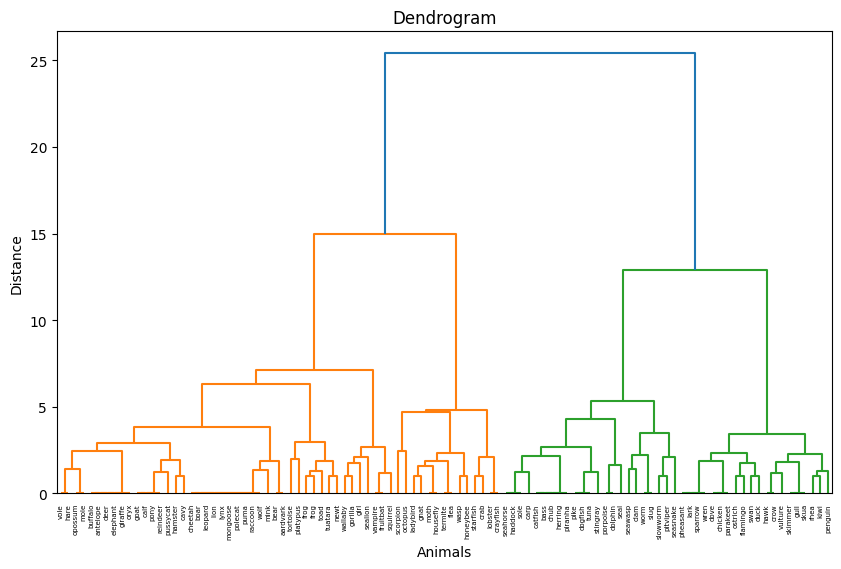

In [15]:

# Plot a dendrogram
linked = linkage(feature_data, 'ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', labels=data['animal_name'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Animals')
plt.ylabel('Distance')
plt.show()